Gold Price Prediction

Dataset: https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns

c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
dataset=pd.read_csv('gld_price_data.csv')
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
dataset.shape

(2290, 6)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


<AxesSubplot:>

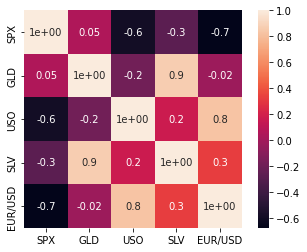

In [6]:
from __future__ import annotations

corr=dataset.corr()
sns.heatmap(corr,cbar=True,square=True,fmt='.1',annot=True)

c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

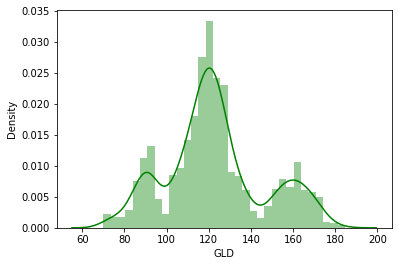

In [7]:
sns.distplot(dataset['GLD'],color="green")

In [9]:
X=dataset.drop(['Date',"GLD"],axis=1)
Y=dataset["GLD"]

In [10]:
# splitting the data 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [11]:
model=RandomForestRegressor(n_estimators=100)

In [12]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [14]:
test_pred=model.predict(X_test)
test_acc=metrics.r2_score(Y_test,test_pred)
test_acc

0.9894599226080489

In [16]:
Y_test=list(Y_test)

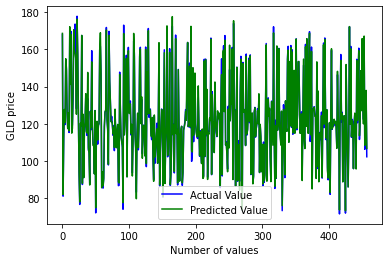

In [18]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_pred,color='green',label='Predicted Value')
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.legend()
plt.show()